In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys, json, joblib
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
'./0.1/'

'./0.1/'

In [3]:
results = {}
for i in sorted(glob('./*/*/*_results.json')):
    ratio = os.path.dirname(os.path.dirname(i)).replace('./','')
    with open(i,'r') as f:
        results[ratio]=json.load(f)
        
    results[ratio]['Train Size'] = joblib.load(glob(os.path.join(os.path.dirname(os.path.dirname(i)),'*_train.bin'))[0])['X'].shape[0]
    

In [4]:
def combinded(path):
    splitsort = []
    smaller = []
    for i in glob(os.path.join(path, '*log.csv')):
        splitname = os.path.basename(i).split('_')
        if len(splitname)==3:
            splitsort.append((int(splitname[0]),i))
        else:
            smaller.append(i)

    loss = []
    for i in list(np.array(sorted(splitsort))[:,1])+smaller:
        print(f"Processing file: {i}")
        loss.append(split(i)[:, 1])  # Get only the loss values (assumed to be in the second column)
    plt.plot(np.hstack(loss))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    return plt
    # plt.show()

def split(path):
    """Helper function to read CSV file and extract required columns."""
    save = []
    with open(path, 'r') as f:
        for line in f:
            if ':' in line:
                split_line = line.strip().split(',')
                # Assuming the structure of each line is: [timestamp, loss_value, ...]
                save.append((float(split_line[1]), float(split_line[2])))
    return np.array(save)

In [5]:
# for i in sorted(glob('5/0.*/M-M-CZ_HWE-CNOT')):
#     combinded(i).legend(title=i)
#     plt.show()

In [6]:
r_df = pd.DataFrame(results).drop(index=['MSE_train','MSE_test'])

<Axes: xlabel='Train Size', ylabel='value'>

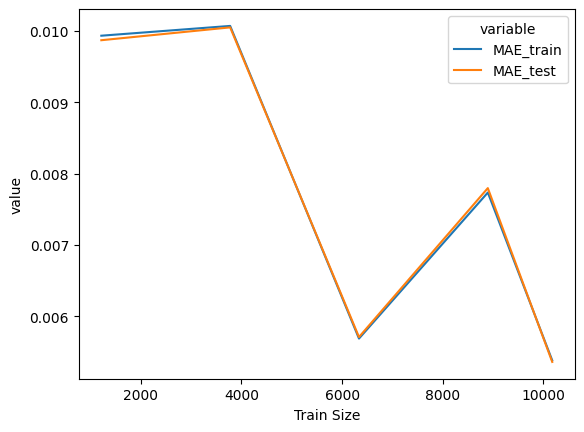

In [7]:
sns.lineplot(data=r_df.T.melt(id_vars=['Train Size'], value_vars=['MAE_train','MAE_test']),x='Train Size',y='value',hue='variable')

<Axes: xlabel='Train Size', ylabel='value'>

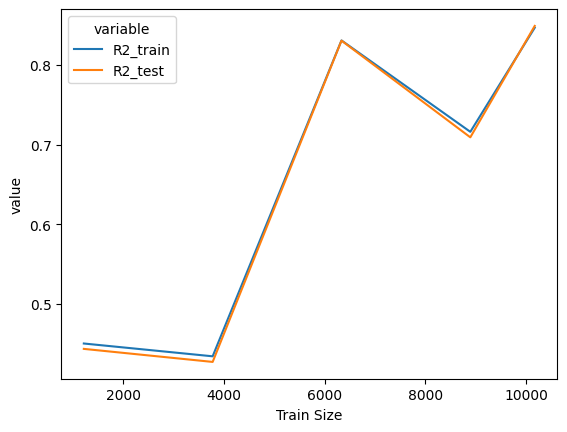

In [8]:
sns.lineplot(data=r_df.T.melt(id_vars=['Train Size'], value_vars=['R2_train','R2_test']),x='Train Size',y='value',hue='variable')

<Axes: xlabel='index', ylabel='value'>

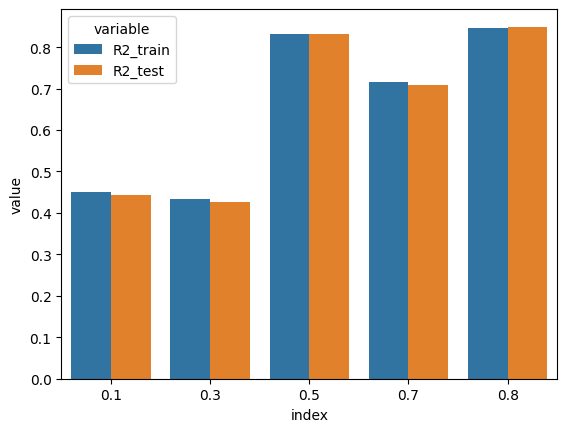

In [9]:
sns.barplot(data=r_df.T[['R2_train','R2_test']].reset_index().melt(id_vars=['index'], value_vars=['R2_train','R2_test']),x='index',y='value',hue='variable')

In [10]:
df = pd.read_csv('0.5/A2_HWE-CNOT/A2_HWE-CNOT_predicted_values.csv')
df['Predicted'] = [float(i.strip('[]')) for i in df['Predicted'].values]
df['Reference'] = [float(i.strip('[]')) for i in df['Reference'].values]

In [11]:
r2_score(df['Reference'],df['Predicted'])

0.8309326211231138

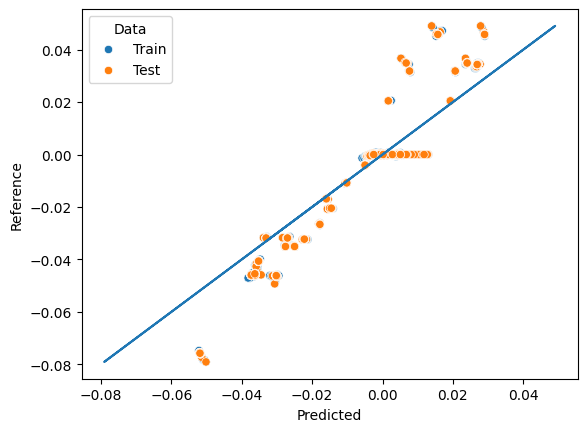

In [12]:
sns.scatterplot(df,x='Predicted',y='Reference',hue='Data')
plt.plot(df['Reference'],df['Reference'])